<a href="https://colab.research.google.com/github/riztikamerista/2025_PBO_TI1C/blob/main/Jobsheet2_Visi_Komputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Memulai Klasifikasi Gambar dengan Dataset Sederhana

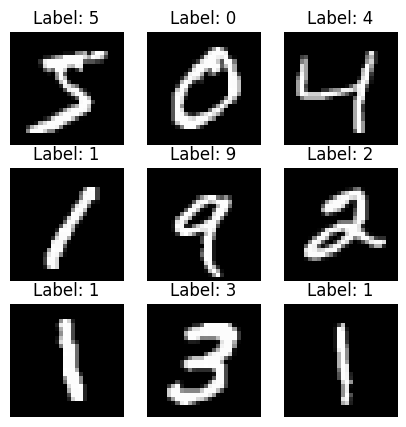

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

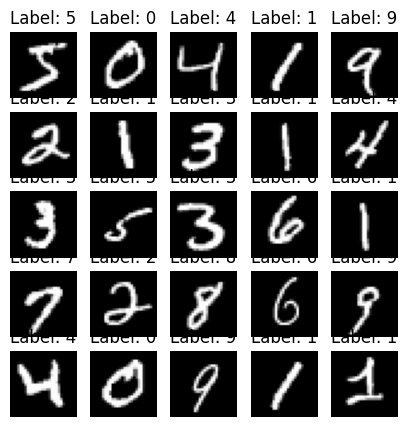

In [ ]:
# Cobalah ganti range(9) dengan range(25) untuk menampilkan lebih banyak contoh.
# Apa yang Anda perhatikan dari bentuk tulisan tangan manusia?

import numpy as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

# Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit (x_train_flat[:5000], y_train[:5000]) #gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


In [ ]:
# Ubah kernel dari linear menjadi rbf.
# Bagaimana pengaruhnya terhadap akurasi?

from sklearn import svm
from sklearn.metrics import accuracy_score

#Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit (x_train_flat[:5000], y_train[:5000]) #gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


# Membangun CNN Sederhana

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8971 - loss: 0.3580 - val_accuracy: 0.9828 - val_loss: 0.0641
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9800 - loss: 0.0663 - val_accuracy: 0.9838 - val_loss: 0.0574
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9880 - loss: 0.0387 - val_accuracy: 0.9868 - val_loss: 0.0475
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9912 - loss: 0.0275 - val_accuracy: 0.9863 - val_loss: 0.0504
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9946 - loss: 0.0175 - val_accuracy: 0.9868 - val_loss: 0.0541


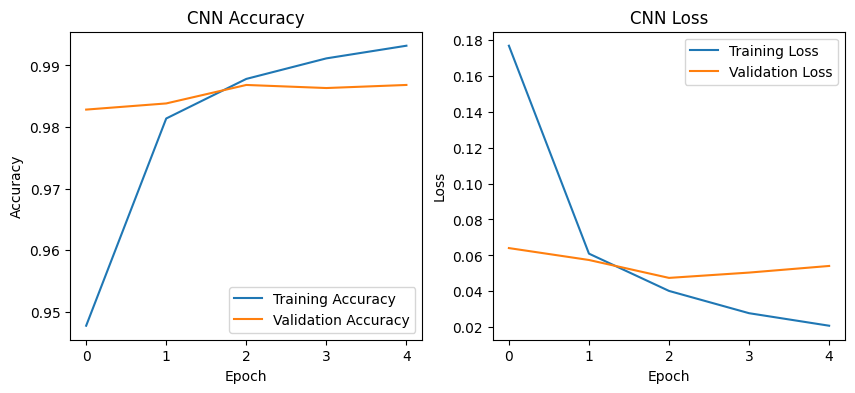

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot History =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.8933 - loss: 0.3468 - val_accuracy: 0.9838 - val_loss: 0.0537
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.9838 - loss: 0.0520 - val_accuracy: 0.9882 - val_loss: 0.0419
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9902 - loss: 0.0311 - val_accuracy: 0.9898 - val_loss: 0.0389
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 33ms/step - accuracy: 0.9917 - loss: 0.0246 - val_accuracy: 0.9935 - val_loss: 0.0281
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9948 - loss: 0.0161 - val_accuracy: 0.9918 - val_loss: 0.0399


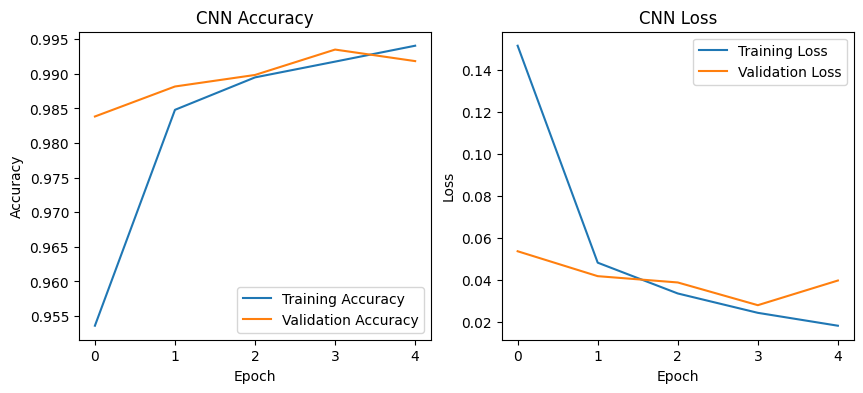

In [ ]:
# Tambahkan satu lapisan Conv2D lagi sebelum Flatten.
# Apakah akurasinya meningkat?

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# ====== Load Dataset ======
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# ====== Model dengan tambahan Conv2D ======
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),

    # Tambahan Conv2D kedua
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ====== Plot History ======
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.0956 - loss: 2.3085 - val_accuracy: 0.1080 - val_loss: 2.3040
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.0987 - loss: 2.3035 - val_accuracy: 0.1090 - val_loss: 2.3023
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.1065 - loss: 2.3026 - val_accuracy: 0.1080 - val_loss: 2.3021
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.1084 - loss: 2.3027 - val_accuracy: 0.1100 - val_loss: 2.3019
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.1091 - loss: 2.3022 - val_accuracy: 0.0990 - val_loss: 2.3044
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.1118 - loss: 2.2992 - val_accuracy: 0.1000 - val_loss: 2.3039
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.1336 - loss: 2.2903 - val_accuracy: 0.1130 - val_loss: 2.3116
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.1445 - loss: 2.2695 - 

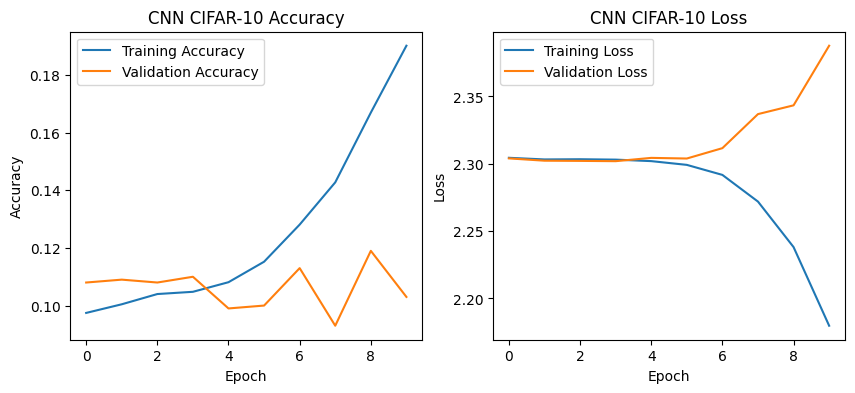

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_test/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'), layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split= 0.1)

# ==== Plot history ====
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 46ms/step - accuracy: 0.2797 - loss: 1.9322 - val_accuracy: 0.5090 - val_loss: 1.3913
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.4580 - loss: 1.5001 - val_accuracy: 0.5880 - val_loss: 1.2017
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.5082 - loss: 1.3669 - val_accuracy: 0.6062 - val_loss: 1.1200
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 95s 55ms/step - accuracy: 0.5427 - loss: 1.2787 - val_accuracy: 0.6320 - val_loss: 1.0678
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 73s 52ms/step - accuracy: 0.5601 - loss: 1.2262 - val_accuracy: 0.6462 - val_loss: 1.0227
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.5841 - loss: 1.1588 - val_accuracy: 0.6582 - val_loss: 1.0189
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 47ms/step - accuracy: 0.5993 - loss: 1.1181 - val_accuracy: 0.6782 - val_loss: 0.9538
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.6084 -

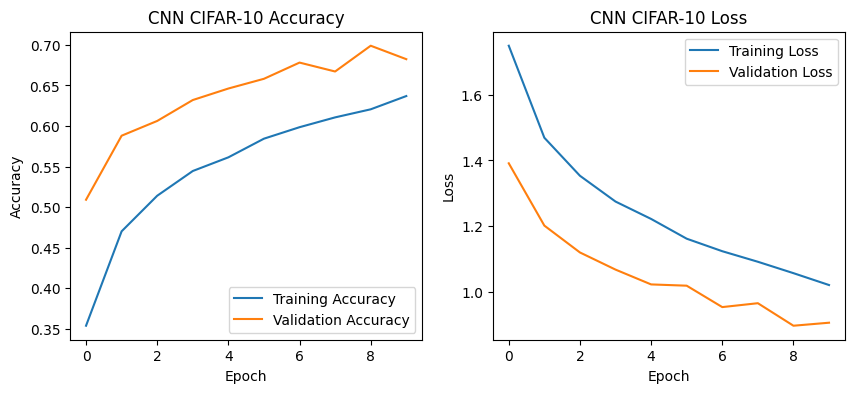

In [ ]:
# Coba tambahkan Dropout(0.5) sebelum lapisan Dense terakhir.
# Apa pengaruhnya pada overfitting?

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# ===== Load Dataset =====
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0   # <- perbaiki, tadi salahnya x_test dua kali

# ===== Model =====
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    # Tambahan Dropout untuk mengurangi overfitting
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot History =====
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Transfer Learning dengan Model Pra-Latih

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 721s 511ms/step - accuracy: 0.4588 - loss: 1.5572 - val_accuracy: 0.5756 - val_loss: 1.2075
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 729s 502ms/step - accuracy: 0.5799 - loss: 1.2069 - val_accuracy: 0.5788 - val_loss: 1.2042
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 742s 502ms/step - accuracy: 0.5996 - loss: 1.1476 - val_accuracy: 0.5802 - val_loss: 1.1803
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 730s 493ms/step - accuracy: 0.6154 - loss: 1.1023 - val_accuracy: 0.6016 - val_loss: 1.1370
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 757s 504ms/step - accuracy: 0.6250 - loss: 1.0679 - val_accuracy: 0.6186 - val_loss: 1.1055


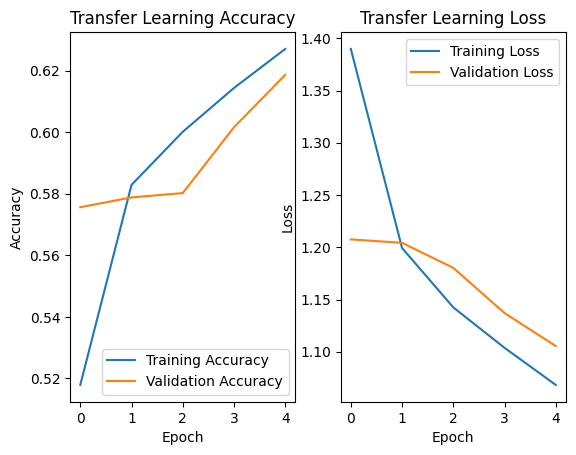

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model, layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history ===== plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 636s 450ms/step - accuracy: 0.4489 - loss: 1.5672 - val_accuracy: 0.5654 - val_loss: 1.2412
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 663s 437ms/step - accuracy: 0.5753 - loss: 1.2153 - val_accuracy: 0.6002 - val_loss: 1.1535
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 620s 436ms/step - accuracy: 0.5982 - loss: 1.1486 - val_accuracy: 0.6014 - val_loss: 1.1460
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 713s 506ms/step - accuracy: 0.6365 - loss: 1.0477 - val_accuracy: 0.6388 - val_loss: 1.0369
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 710s 505ms/step - accuracy: 0.6721 - loss: 0.9517 - val_accuracy: 0.6486 - val_loss: 1.0029
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 746s 507ms/step - accuracy: 0.6906 - loss: 0.8911 - val_accuracy: 0.6612 - val_loss: 0.9783
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 720s 492ms/step - accuracy: 0.7075 - loss: 0.8367 - val_a

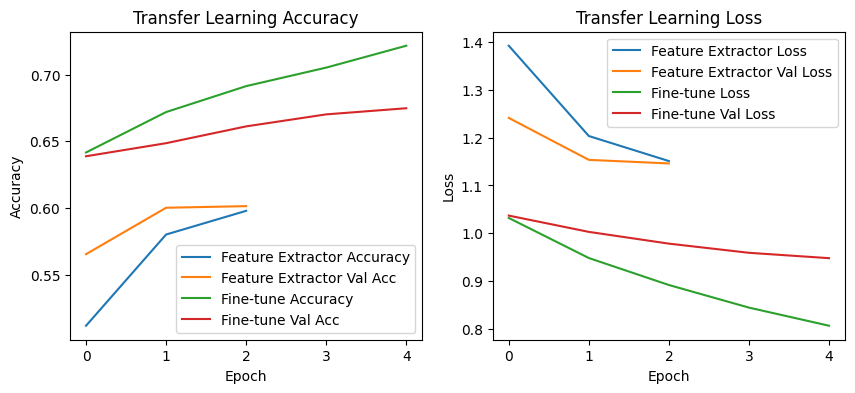

In [3]:
# Coba aktifkan 1–2 lapisan terakhir dari base_model (fine-tuning).
# Bagaimana akurasinya berubah?

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# ===== Load Dataset =====
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# ===== Base Model (VGG16) =====
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False   # awalnya dibekukan dulu

# ===== Model =====
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile awal
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Latihan awal (feature extractor saja)
history = model.fit(x_train, y_train, epochs=3, validation_split=0.1)

# ===== Fine-tuning: aktifkan 1–2 lapisan terakhir =====
base_model.trainable = True
for layer in base_model.layers[:-2]:   # freeze semua kecuali 2 terakhir
    layer.trainable = False

# Compile ulang dengan learning rate kecil (biar tidak merusak bobot pretrained)
model.compile(
    optimizer=Adam(1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Latihan lagi dengan fine-tuning
history_ft = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot History =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Feature Extractor Accuracy')
plt.plot(history.history['val_accuracy'], label='Feature Extractor Val Acc')
plt.plot(history_ft.history['accuracy'], label='Fine-tune Accuracy')
plt.plot(history_ft.history['val_accuracy'], label='Fine-tune Val Acc')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Feature Extractor Loss')
plt.plot(history.history['val_loss'], label='Feature Extractor Val Loss')
plt.plot(history_ft.history['loss'], label='Fine-tune Loss')
plt.plot(history_ft.history['val_loss'], label='Fine-tune Val Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 121s 387ms/step
              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1000
           1       0.78      0.71      0.74      1000
           2       0.61      0.56      0.58      1000
           3       0.50      0.48      0.49      1000
           4       0.60      0.59      0.60      1000
           5       0.61      0.50      0.55      1000
           6       0.62      0.76      0.68      1000
           7       0.74      0.72      0.73      1000
           8       0.72      0.82      0.76      1000
           9       0.75      0.67      0.71      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



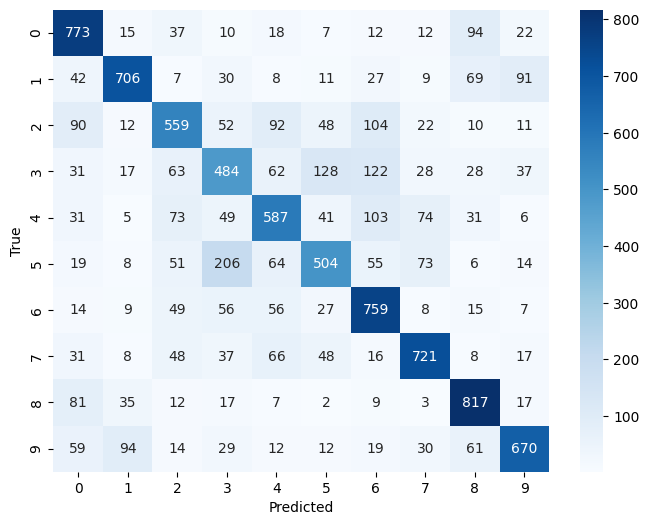

In [4]:
# Dari confusion matrix, identifikasi kelas apa yang paling sering salah diklasifikasikan.
# Menurut Anda, mengapa hal itu bisa terjadi?

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Penugasan

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.8703 - loss: 0.4076 - val_accuracy: 0.9849 - val_loss: 0.0458
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9771 - loss: 0.0757 - val_accuracy: 0.9870 - val_loss: 0.0384
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9835 - loss: 0.0541 - val_accuracy: 0.9898 - val_loss: 0.0322
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9863 - loss: 0.0456 - val_accuracy: 0.9906 - val_loss: 0.0292
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9882 - loss: 0.0385 - val_accuracy: 0.9916 - val_loss: 0.0275
313/313 - 3s - 8ms/step - accuracy: 0.9916 - loss: 0.0275
Akurasi pada data test: 0.991599977016449
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


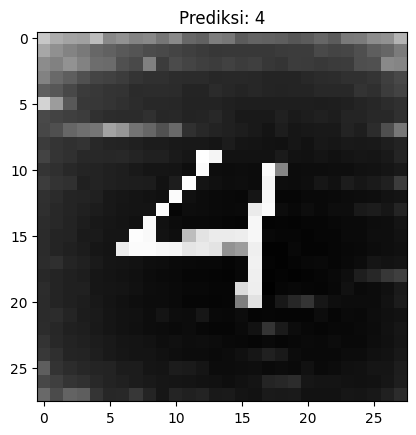

Hasil prediksi angka: 4


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import cv2
import matplotlib.pyplot as plt

# ================================
# 1. Load dataset MNIST
# ================================
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi data (0-1) dan reshape ke format CNN
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# ================================
# 2. Buat model CNN
# ================================
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# ================================
# 3. Training model
# ================================
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# ================================
# 4. Evaluasi model
# ================================
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Akurasi pada data test:", test_acc)

# ================================
# 5. Prediksi foto kamu
# ================================
# Ganti path sesuai foto kamu
img_path = "angka.jpeg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)   # baca grayscale
img = cv2.resize(img, (28, 28))                   # resize ke 28x28
img = 255 - img                                   # invert warna (biar mirip MNIST)
img = img / 255.0                                 # normalisasi
img = img.reshape(1, 28, 28, 1)                   # reshape ke format CNN

prediction = model.predict(img)
predicted_label = np.argmax(prediction)

plt.imshow(img.reshape(28,28), cmap="gray")
plt.title(f"Prediksi: {predicted_label}")
plt.show()

print("Hasil prediksi angka:", predicted_label)
